In [27]:
# import libraries

import matplotlib.pyplot as plt
from matplotlib import image # To import images
import numpy as np
from matplotlib.colors import Normalize
from skimage.color import rgb2gray # You need to install scikit-image

## Plotting an image

In [14]:
# First, we need to import the figure,
cat = image.imread("Cat_pic.jpg")
print(cat.shape) # RGB 360*540 pixels

(360, 540, 3)


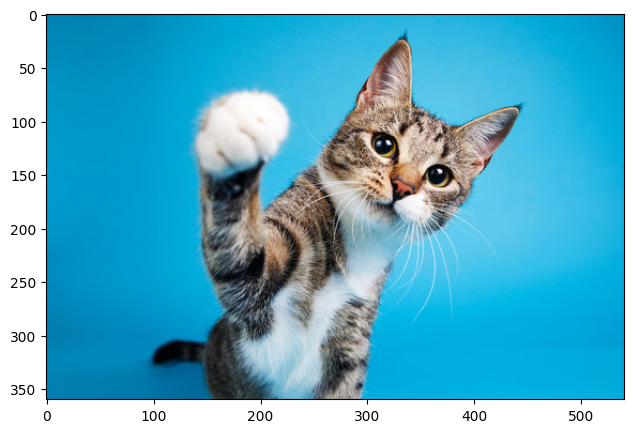

In [16]:
# after that, we define a figure to plot our image
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,5))
ax.imshow(cat)

In [21]:
# This is an example function from https://matplotlib.org/stable/gallery/mplot3d/imshow3d.html#sphx-glr-gallery-mplot3d-imshow3d-py

def imshow3d(ax, array, value_direction='z', pos=0, norm=None, cmap=None):
    """
    Display a 2D array as a  color-coded 2D image embedded in 3d.

    The image will be in a plane perpendicular to the coordinate axis *value_direction*.

    Parameters
    ----------
    ax : Axes3D
        The 3D Axes to plot into.
    array : 2D numpy array
        The image values.
    value_direction : {'x', 'y', 'z'}
        The axis normal to the image plane.
    pos : float
        The numeric value on the *value_direction* axis at which the image plane is
        located.
    norm : `~matplotlib.colors.Normalize`, default: Normalize
        The normalization method used to scale scalar data. See `imshow()`.
    cmap : str or `~matplotlib.colors.Colormap`, default: :rc:`image.cmap`
        The Colormap instance or registered colormap name used to map scalar data
        to colors.
    """
    if norm is None:
        norm = Normalize()
    colors = plt.get_cmap(cmap)(norm(array))

    if value_direction == 'x':
        nz, ny = array.shape
        zi, yi = np.mgrid[0:nz + 1, 0:ny + 1]
        xi = np.full_like(yi, pos)
    elif value_direction == 'y':
        nx, nz = array.shape
        xi, zi = np.mgrid[0:nx + 1, 0:nz + 1]
        yi = np.full_like(zi, pos)
    elif value_direction == 'z':
        ny, nx = array.shape
        yi, xi = np.mgrid[0:ny + 1, 0:nx + 1]
        zi = np.full_like(xi, pos)
    else:
        raise ValueError(f"Invalid value_direction: {value_direction!r}")
    ax.plot_surface(xi, yi, zi, rstride=1, cstride=1, facecolors=colors, shade=False)

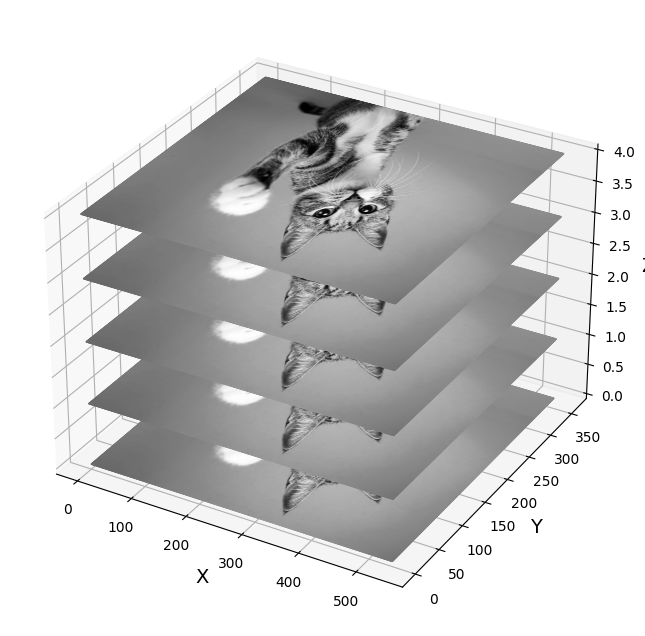

In [36]:
# Another example of 3D stacking
cat_bw = rgb2gray(cat)


fig_3D = plt.figure(figsize = (8,8))
ax_3D = fig_3D.add_subplot(projection='3d')

ax_3D.set_xlabel("X", fontsize = 14)
ax_3D.set_ylabel("Y", fontsize = 14)
ax_3D.set_zlabel("Z", fontsize = 14)

# Stack 5 cats:
for i in range(5):
    imshow3d(ax_3D, cat_bw, cmap = 'gray', pos = i)
    

plt.show()
